# Confidence in Math

> **Note the following:** 
> 1. This is *not* meant to be an example of an actual **data analysis project**, just an example of how to structure such a project.
> 1. Remember the general advice on structuring and commenting your code
> 1. The `dataproject.py` file includes a function which can be used multiple times in this notebook.

Imports and set magics:

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
#from matplotlib_venn import venn2

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# user written modules
import dataproject


# Read and clean data

We import our datasets from a CSV-file to a panda dataframe and then keep only the variables we need 

In [2]:
student = pd.read_csv('asgdnkz7.csv')

#Keep only the columns we need
cols_to_keep_s = ['IDSTUD', 'ASBG01', 'ASBG04', 'ASBGDML', 'ASBGSLM', 'ASBGSCM', 'ASMMAT01']

student = student[cols_to_keep_s]

#Drop rows with missing values for our primary variables
student = student.dropna(subset=['IDSTUD', 'ASBG01', 'ASBGSCM', 'ASMMAT01'])

#Make the gender variable a dummy 
student['ASBG01'] = student['ASBG01'].replace({1: 0, 2: 1}).astype(int)

#Make the number of books variable to a dummy 
student['ASBG04'] = student['ASBG04'].apply(lambda x: 1 if x > 3 else 0)

#Rename variables
student = student.rename(columns={
    'ASBG01': 'male',
    'ASBG04': 'many_books',
    'ASBGDML': 'bad_beh_mat', 
    'ASBGSLM': 'like_mat', 
    'ASBGSCM': 'conf_mat', 
    'ASMMAT01': 'score_mat'
})

student

,IDSTUD,male,many_books,bad_beh_mat,like_mat,conf_mat,score_mat
0,50010101.0,1,0,10.17203,7.98325,9.67422,564.16173
1,50010102.0,1,1,9.65042,8.17345,9.42421,589.88375
2,50010103.0,0,0,9.15042,9.72723,11.70061,514.63289
3,50010106.0,0,0,12.34583,3.85307,6.32925,422.80754
4,50010107.0,1,0,10.79976,3.85307,7.70454,470.52185
...,...,...,...,...,...,...,...
3688,52020115.0,0,0,11.19445,8.14669,8.85216,519.89076
3689,52020120.0,1,0,9.65042,8.14669,9.22621,535.43639
3690,52020121.0,1,0,10.17203,9.31319,11.14456,523.01763
3691,52020123.0,0,0,8.61844,7.63586,7.91361,419.64660


In [3]:
teacher = pd.read_csv('atgdnkz7.csv')

#Keep only the columns we need
cols_to_keep_t = ['IDTEALIN', 'IDLINK', 'ATBG02', 'ATBG05AC', 'ATDMMEM']

teacher = teacher[cols_to_keep_t]

#Drop rows with missing values for our primary variables
teacher = teacher.dropna(subset=['IDTEALIN', 'IDLINK', 'ATBG02', 'ATDMMEM'])

#Make the gender variable a dummy 
teacher['ATBG02'] = teacher['ATBG02'].replace({1: 0, 2: 1}).astype(int)

#Make the major in mathemathics variable a dummy 
teacher['ATBG05AC'] = teacher['ATBG05AC'].replace({2: 0})

#Make the education categorical variable to dummies
dummies = pd.get_dummies(teacher['ATDMMEM'])
dummies.columns = ['mat_and_educ', 'educ', 'mat', 'other_major', 'no_major']

dummies = dummies.astype(int)

#merge the new dummies to the teacher dataset
teacher = pd.concat([teacher, dummies], axis=1)

#Rename the major variable values to string 
teacher['ATDMMEM'] = teacher['ATDMMEM'].replace({1: 'mat and educ', 2: 'educ', 3: 'mat', 4: 'other major', 5: 'no major'})

#Rename variables
teacher = teacher.rename(columns={
    'ATBG02': 'male_t',
    'ATBG05AC': 'mat_major',
    'ATDMMEM': 'major'
})

teacher

,IDTEALIN,IDLINK,male_t,mat_major,major,mat_and_educ,educ,mat,other_major,no_major
0,50010101.0,1.0,0,1.0,mat,0,0,1,0,0
1,50020103.0,3.0,1,1.0,mat and educ,1,0,0,0,0
2,50020204.0,4.0,1,1.0,mat,0,0,1,0,0
3,50030202.0,2.0,1,0.0,other major,0,0,0,1,0
4,50030404.0,4.0,1,0.0,other major,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
302,52000101.0,1.0,1,1.0,mat,0,0,1,0,0
305,52000303.0,3.0,0,1.0,mat and educ,1,0,0,0,0
306,52010101.0,1.0,1,0.0,educ,0,1,0,0,0
307,52020101.0,1.0,1,0.0,other major,0,0,0,1,0


In [4]:
ts_link = pd.read_csv('astdnkz7.csv')

#Keep only the columns we need
cols_to_keep_ts = ['IDSTUD', 'IDTEALIN', 'IDLINK', 'MATSUBJ']
ts_link = ts_link[cols_to_keep_ts]

#Drop rows with missing values for our primary variables
ts_link = ts_link.dropna(subset=['IDSTUD', 'IDTEALIN', 'IDLINK', 'MATSUBJ'])
ts_link.head(20)

ts_link

,IDSTUD,IDTEALIN,IDLINK,MATSUBJ
0,50010101.0,50010101.0,1.0,1.0
1,50010102.0,50010101.0,1.0,1.0
2,50010103.0,50010101.0,1.0,1.0
3,50010106.0,50010101.0,1.0,1.0
4,50010107.0,50010101.0,1.0,1.0
...,...,...,...,...
5867,52020121.0,52020101.0,1.0,1.0
5868,52020123.0,52020101.0,1.0,1.0
5869,52020123.0,52020202.0,2.0,0.0
5870,52020124.0,52020202.0,2.0,0.0


## Explore each data set

In order to be able to **explore the raw data**, we provide some **static** and **interactive plots** to show important developments 

We start with the student dataset

In [5]:
def plot_func_s(column):
    for gender in student['male'].unique():
        student[student['male'] == gender][column].plot(kind='hist', rwidth=0.8, alpha=0.5, label=f'Gender {gender}')
    plt.legend()
    plt.show()

columns_s = ['many_books', 'bad_beh_mat', 'like_mat', 'conf_mat', 'score_mat']
widgets.interact(plot_func_s, column=widgets.Dropdown(options=columns_s, value='many_books', description='Column:'))

interactive(children=(Dropdown(description='Column:', options=('many_books', 'bad_beh_mat', 'like_mat', 'conf_…

<function __main__.plot_func_s(column)>

Explain what you see when moving elements of the interactive plot around. 

We then look at the teacher dataset

In [6]:
def plot_func_t(column):
    teacher[column].plot(kind='hist', rwidth=0.8)
    plt.show()

columns_t = ['male_t', 'mat_major', 'major', 'mat_and_educ', 'educ', 'mat', 'other_major', 'no_major']
widgets.interact(plot_func_t, column=widgets.Dropdown(options=columns_t, value='male_t', description='Column:'))

interactive(children=(Dropdown(description='Column:', options=('male_t', 'mat_major', 'major', 'mat_and_educ',…

<function __main__.plot_func_t(column)>

# Merge data sets

Now you create combinations of your loaded data sets. Remember the illustration of a (inner) **merge**:

In [7]:
# Now we merge 'teacher' with 'ts_link' to have the whole dataset:
teacher_merged = pd.merge(teacher, ts_link, on=['IDTEALIN', 'IDLINK'], how='inner')
teacher_merged = teacher_merged[teacher_merged['MATSUBJ'] == 1]
teacher_merged

,IDTEALIN,IDLINK,male_t,mat_major,major,mat_and_educ,educ,mat,other_major,no_major,IDSTUD,MATSUBJ
0,50010101.0,1.0,0,1.0,mat,0,0,1,0,0,50010101.0,1.0
1,50010101.0,1.0,0,1.0,mat,0,0,1,0,0,50010102.0,1.0
2,50010101.0,1.0,0,1.0,mat,0,0,1,0,0,50010103.0,1.0
3,50010101.0,1.0,0,1.0,mat,0,0,1,0,0,50010106.0,1.0
4,50010101.0,1.0,0,1.0,mat,0,0,1,0,0,50010107.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4613,52020101.0,1.0,1,0.0,other major,0,0,0,1,0,52020115.0,1.0
4614,52020101.0,1.0,1,0.0,other major,0,0,0,1,0,52020120.0,1.0
4615,52020101.0,1.0,1,0.0,other major,0,0,0,1,0,52020121.0,1.0
4616,52020101.0,1.0,1,0.0,other major,0,0,0,1,0,52020123.0,1.0


Here we are dropping elements from both data set teacher and data set ts_link. A left join would keep all observations in data teacher intact and subset only from ts_link.

We now do a left merge between the student dataset and the teacher_merges dataset, ensuring that we keep all observations in the studentdataset 

In [8]:
# Now we merge 'teacher' with 'ts_link' to have the whole dataset:
student_merged = pd.merge(student, teacher_merged, on=['IDSTUD'], how='left')
student_merged

,IDSTUD,male,many_books,bad_beh_mat,like_mat,conf_mat,score_mat,IDTEALIN,IDLINK,male_t,mat_major,major,mat_and_educ,educ,mat,other_major,no_major,MATSUBJ
0,50010101.0,1,0,10.17203,7.98325,9.67422,564.16173,50010101.0,1.0,0.0,1.0,mat,0.0,0.0,1.0,0.0,0.0,1.0
1,50010102.0,1,1,9.65042,8.17345,9.42421,589.88375,50010101.0,1.0,0.0,1.0,mat,0.0,0.0,1.0,0.0,0.0,1.0
2,50010103.0,0,0,9.15042,9.72723,11.70061,514.63289,50010101.0,1.0,0.0,1.0,mat,0.0,0.0,1.0,0.0,0.0,1.0
3,50010106.0,0,0,12.34583,3.85307,6.32925,422.80754,50010101.0,1.0,0.0,1.0,mat,0.0,0.0,1.0,0.0,0.0,1.0
4,50010107.0,1,0,10.79976,3.85307,7.70454,470.52185,50010101.0,1.0,0.0,1.0,mat,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3637,52020115.0,0,0,11.19445,8.14669,8.85216,519.89076,52020101.0,1.0,1.0,0.0,other major,0.0,0.0,0.0,1.0,0.0,1.0
3638,52020120.0,1,0,9.65042,8.14669,9.22621,535.43639,52020101.0,1.0,1.0,0.0,other major,0.0,0.0,0.0,1.0,0.0,1.0
3639,52020121.0,1,0,10.17203,9.31319,11.14456,523.01763,52020101.0,1.0,1.0,0.0,other major,0.0,0.0,0.0,1.0,0.0,1.0
3640,52020123.0,0,0,8.61844,7.63586,7.91361,419.64660,52020101.0,1.0,1.0,0.0,other major,0.0,0.0,0.0,1.0,0.0,1.0


# Analysis

To get a quick overview of the data, we show some **summary statistics** on a meaningful aggregation. 

We analyse what the relation between confidence and score in maths is and the difference between girls and boys in this regard.

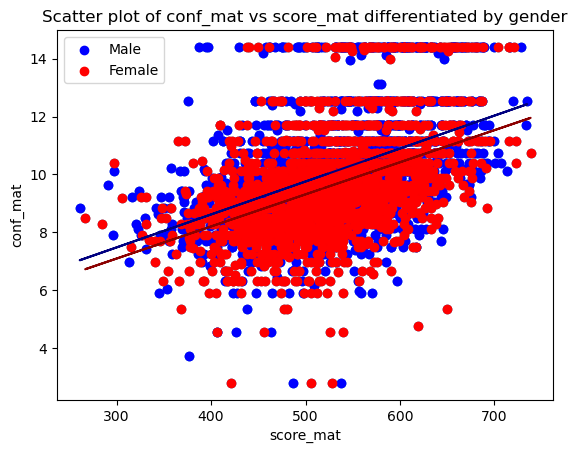

In [9]:
#Scatter plot of the relationship between score in mathematics and cofindence in mathematics
plt.scatter(student_merged['score_mat'], student_merged['conf_mat'])

male = student_merged[student_merged['male'] == 1]
female = student_merged[student_merged['male'] == 0]

# Perform linear regression
slope_m, intercept_m = np.polyfit(male['score_mat'], male['conf_mat'], 1)
slope_f, intercept_f = np.polyfit(female['score_mat'], female['conf_mat'], 1)

plt.scatter(male['score_mat'], male['conf_mat'], color='blue', label='Male')
plt.scatter(female['score_mat'], female['conf_mat'], color='red', label='Female')


# Add tendency line
plt.plot(male['score_mat'], slope_m * male['score_mat'] + intercept_m, color='navy')

# Add tendency line
plt.plot(female['score_mat'], slope_f * female['score_mat'] + intercept_f, color='darkred')

plt.xlabel('score_mat')
plt.ylabel('conf_mat')
plt.title('Scatter plot of conf_mat vs score_mat differentiated by gender')
plt.legend()
plt.show()

We see that for the same score in maths girls tends to have a lower confidence in regards to their ability in maths. 

In [10]:
#we delete the observation with missing values for teachers gender in the female dataset
female = female.dropna(subset=['male_t'])

# Define a function that plots a bar chart for a selected column
def plot_chart(column):
    mean_values = female.groupby('male_t')[column].mean()
    color = 'blue' if column == 'score_mat' else 'orange'
    mean_values.plot(kind='bar', alpha=0.75, color=color)
    plt.ylabel('Mean Value')
    plt.title(f'Mean values of {column} for females depending on the teacher\'s gender')
    plt.show()

# Create a dropdown widget
columns=['score_mat', 'conf_mat']
widgets.interact(plot_chart, column=widgets.Dropdown(options=columns, value='score_mat', description='Column:'))

interactive(children=(Dropdown(description='Column:', options=('score_mat', 'conf_mat'), value='score_mat'), O…

<function __main__.plot_chart(column)>

We see pretty much no difference across score and confidence for female students depeding on the gender of the teacher.  

We then look at the difference in confidence and scores for all students depending on wheter the teacher has a major i maths, maths and education, eduction, other major or no major. 

In [11]:
#we delete the observation with missing values for teachers major
student_merged = student_merged.dropna(subset=['major'])

# Define a function that plots a bar chart for a selected column
def plot_chart_all(column):
    mean_values = student_merged.groupby('major')[column].mean()
    color = 'blue' if column == 'score_mat' else 'orange'
    mean_values.plot(kind='bar', alpha=0.75, color=color)
    plt.ylabel('Mean Value')
    plt.title(f'Mean values of {column} for all depending on the teacher\'s major')
    plt.show()

# Create a dropdown widget
columns=['score_mat', 'conf_mat']
widgets.interact(plot_chart_all, column=widgets.Dropdown(options=columns, value='score_mat', description='Column:'))

interactive(children=(Dropdown(description='Column:', options=('score_mat', 'conf_mat'), value='score_mat'), O…

<function __main__.plot_chart_all(column)>

There is no big difference in the math-scores and math-confidence of the student with teachers having different educational background. Only students with a teacher having a educational (but not mathimatical) background have a little higher average score and confidence. 

# Conclusion

Girls have lower confidence in mathematics than boys with the same obtained scores. Both girls scores and confidence do not depent on the gender of their teacher. Neither the teachers education has a big inpact on the output-variables. 